Supervised learning = Model relationship betwen set of input variables X and target variable y. Now moving onto unspervised learning where no explicit target variable y to predict.

*Clustering* is the task of finding groups of similar observations in the dataset. Unsupervised as do not in advance what groups are and dont have example of data points and group assignments.

*Dimensionality reduction* is task of reducing dimensionality of our dataset ie number of features.

**k-means algorithm**

The goal of k-means is to form k groups that minimize a measure called inertia which is simply defined as the sum of the squared distances between each point and the center of their cluster. In the k-means jargon, these centers are called the centroids. The k-means algorithm minimizes inertia by following a simple procedure that can be summarized in three steps.

(1) choose k initial centroids
repeat until convergence:
	(2) match points to the closest centroid
	(3) recenter centroids

k-means algorithm works well if underlying assumptions are met ie nice rounded shape or know numbers in advance

**Scikit-learn implementation**

In [2]:
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()

# Load array of input values X
X = iris["data"]

We know there are 3 flowers so set clusters to 3

In [4]:
from sklearn.cluster import KMeans

# Create k-means object
kmeans = KMeans(n_clusters=3, random_state=0)  # Fix results

# Fit it to the data
kmeans.fit(X, y=None)

KMeans(n_clusters=3, random_state=0)

Explicitly set y=none for clarity

In [5]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [8]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [9]:
# Match new data points to the closest centroids
kmeans.predict(X)  # Equivalent to kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

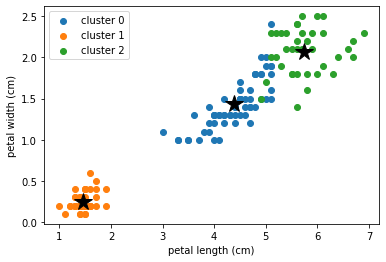

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot clusters
for cluster in [0, 1, 2]:
    # Get points in this cluster
    idx = kmeans.labels_ == cluster

    # Plot points
    plt.scatter(
        X[idx, 2],  # Third column: petal length
        X[idx, 3],  # Fourth column: petal width
        label="cluster {}".format(cluster),
    )

    # Plot centroid
    centroid = kmeans.cluster_centers_[cluster]
    plt.plot(centroid[2], centroid[3], marker="*", color="black", markersize=18)

# Add legend and labels
plt.legend()
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.show()